In [1]:
# import libraries
from src.features.preprocess import *
from src.data.rw_utils import read_from_db, write_to_db
from src.data.data_quality import create_data_quality_report
from src.data.plots import plot_bar_chart, plot_wordcloud
import time
import numpy as np


c:\users\user\anaconda3\envs\findcategory\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# read data from source
df = read_from_db("longform", "all-the-news.db")
df.head()

Data is read. Len of the data 204135 and columns Index(['id', 'title', 'author', 'date', 'content', 'year', 'month',
       'publication', 'category', 'digital', 'section', 'url'],
      dtype='object')


,id,title,author,date,content,year,month,publication,category,digital,section,url
0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017,5,Verge,Longform,1.0,None,None
1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017,5,Verge,Longform,1.0,None,None
2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017,5,Verge,Longform,1.0,None,None
3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017,5,Verge,Longform,1.0,None,None
4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017,5,Verge,Longform,1.0,None,None


In [3]:
# get each label counts
df_label_counts = df["category"].value_counts()
df_label_counts

newspaper       61264
general         52152
broadcast       18672
wire            15055
radio           12001
business         8344
Reports           854
Exclusive         214
Longform          137
Book Reviews       20
Name: category, dtype: int64

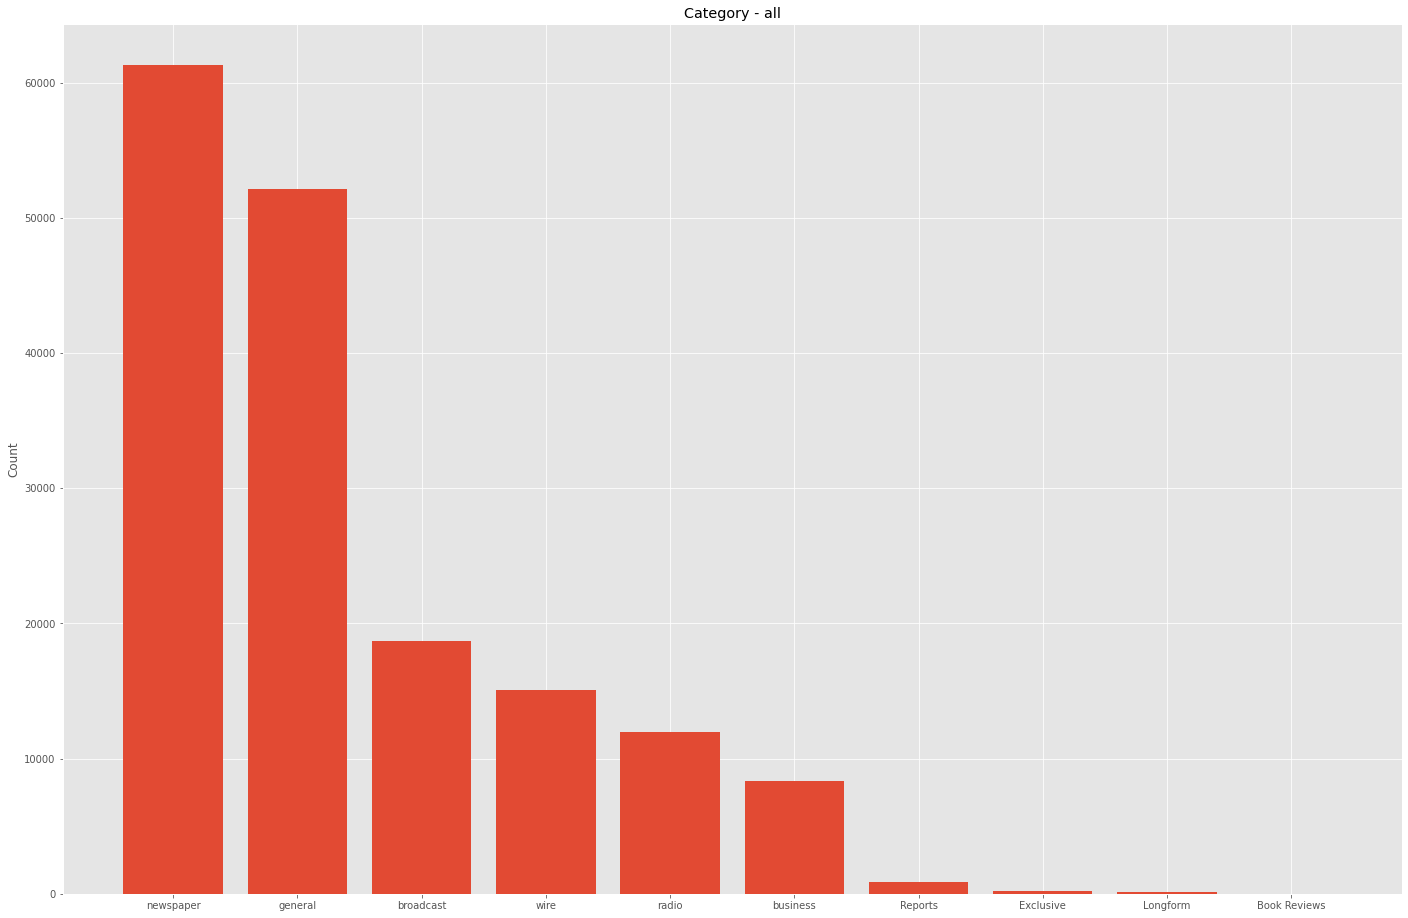

In [4]:
# visualize the sample counts of each label
labels = list(df_label_counts.to_frame().index)
counts = df_label_counts.values
plot_bar_chart(labels, counts, "Category - all").show()

In [5]:
## Data Information
missing_value_df = create_data_quality_report(df, "category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204135 entries, 0 to 204134
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           204135 non-null  int64  
 1   title        204135 non-null  object 
 2   author       172000 non-null  object 
 3   date         191532 non-null  object 
 4   content      191181 non-null  object 
 5   year         191532 non-null  object 
 6   month        191532 non-null  object 
 7   publication  196420 non-null  object 
 8   category     168713 non-null  object 
 9   digital      193115 non-null  float64
 10  section      74572 non-null   object 
 11  url          98796 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 18.7+ MB
#################################################
############ DATA QUALITY RESULT ################
#################################################

Number of sample in data set:204135.
Number of classes in data set: 11 a

In [6]:
missing_value_df

,column_name,percent_missing
id,id,0.000000
title,title,0.000000
author,author,15.742033
date,date,6.173856
content,content,6.345801
year,year,6.173856
month,month,6.173856
publication,publication,3.779362
category,category,17.352242
digital,digital,5.398388


In [7]:
# select columns for operations
df_selected = df[["content", "category"]]
df_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204135 entries, 0 to 204134
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   content   191181 non-null  object
 1   category  168713 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [8]:
df_selected

,content,category
0,And never more so than in Showtime’s new...,Longform
1,AlphaGo’s victory isn’t a defeat for hum...,Longform
2,Super Deluxe built a weird internet empi...,Longform
3,Steven Yang quit his job at Google in th...,Longform
4,Ahead of Black Panther’s 2018 theatrical...,Longform
...,...,...
204130,None,None
204131,"Sammy Stewart, who set a record when he struck...",newspaper
204132,Good morning. (Want to get California Today by...,newspaper
204133,None,None


In [9]:
# drop null values and duplicate values
df_selected['content'].replace('', np.nan, inplace=True)
df_selected = df_selected.dropna()
df_selected = df_selected.drop_duplicates()
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151530 entries, 0 to 204132
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   content   151530 non-null  object
 1   category  151530 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [10]:
df_selected

,content,category
0,And never more so than in Showtime’s new...,Longform
1,AlphaGo’s victory isn’t a defeat for hum...,Longform
2,Super Deluxe built a weird internet empi...,Longform
3,Steven Yang quit his job at Google in th...,Longform
4,Ahead of Black Panther’s 2018 theatrical...,Longform
...,...,...
204126,SAN FRANCISCO — Airbnb agreed on Monday to set...,newspaper
204127,In the Band’s popular song “The Night They Dro...,newspaper
204129,The Rev. Billy Graham admitted in his later ye...,newspaper
204131,"Sammy Stewart, who set a record when he struck...",newspaper


In [13]:
# number of rows is high so that we select just few of the publications contents
# broadcast       18672
# wire            15055
# radio           12001
# business         8344
options = ["broadcast", "wire", "radio", "business", "newspaper", "general"]
df_sampled = df_selected.loc[df_selected['category'].isin(options)]
df_sampled["category"].unique()

array(['newspaper', 'general', 'broadcast', 'business', 'radio', 'wire'],
      dtype=object)

In [14]:
df_sampled_label_counts = df_sampled['category'].value_counts()
df_sampled_label_counts

newspaper    58975
general      46020
broadcast    15861
radio        11997
wire         10714
business      6739
Name: category, dtype: int64

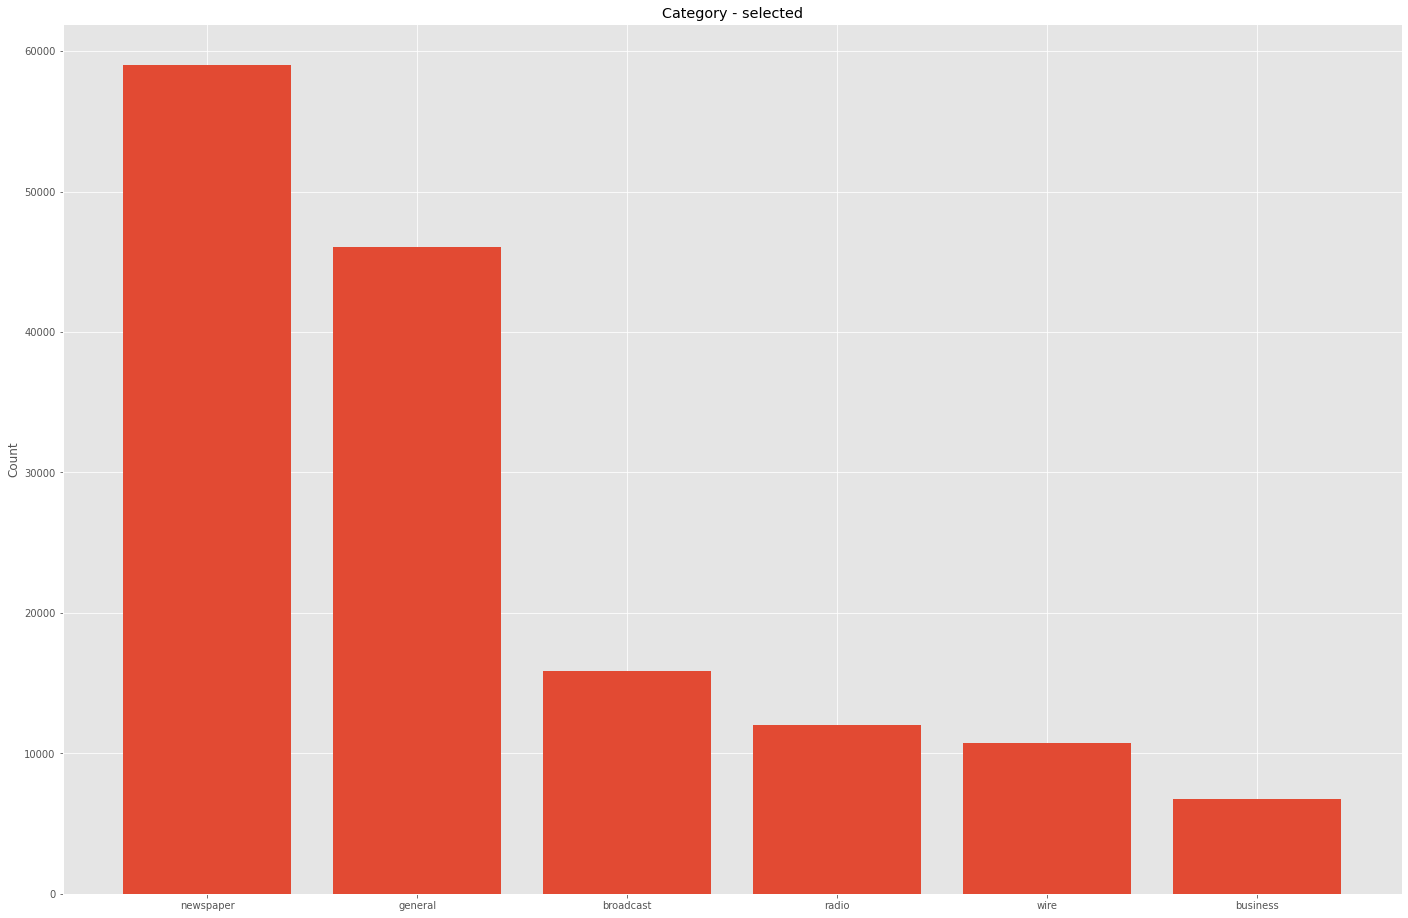

In [15]:
# visualize the sample counts of each label
labels = list(df_sampled_label_counts.to_frame().index)
counts = df_sampled_label_counts.values
plot_bar_chart(labels, counts, "Category - selected").show()

In [16]:
df_sampled

,content,category
1225,The winter sitout period ends on Monday for tr...,newspaper
1226,"""At least 23 people were killed and 17 others ...",newspaper
1227,"Hello! I’m Mark Olsen, and welcome to your wee...",newspaper
1228,Though Carrie Fisher is best known as Princess...,newspaper
1229,There was no place like home for Jeff Carter a...,newspaper
...,...,...
204126,SAN FRANCISCO — Airbnb agreed on Monday to set...,newspaper
204127,In the Band’s popular song “The Night They Dro...,newspaper
204129,The Rev. Billy Graham admitted in his later ye...,newspaper
204131,"Sammy Stewart, who set a record when he struck...",newspaper


In [17]:
# apply preprocess operations
preprocess_operations = [to_lower, remove_hyperlink, remove_number, remove_punctuation, remove_whitespace,
                         replace_special_chars, remove_stopwords, apply_stemmer, remove_less_than_two]

In [18]:
# example result
df_sampled["content"].values[12]

"When Tanner Pearson got off to a hot start this season, he didn’t have any illusions that it would be like that the rest of the way.', 'Pearson scored four goals in his first three games in an almost identical start to two seasons ago, and that took an awful turn. He scored only eight more times in the ensuing three months before his season ended because of a fractured fibula', '“I learned my lesson a couple years back,” Pearson said.', 'Not that Pearson is a sage veteran at 24, but that experience taught him that consistency is elusive and seasons can change drastically.', 'Since this season’s opening outburst, he had scored only four goals in 31 games going into Saturday’s contest against the San Jose Sharks.\\xa0', 'His struggle reflects the Kings’ offensive issues. They had scored 11 goals in seven previous games, and five of those goals were from Jeff Carter.', '“We’ve been too inconsistent, which has been our biggest issue,” Drew Doughty said. “We haven’t scored enough goals … I

In [19]:
apply_preprocess_operations_to_corpus([df_sampled["content"].values[12]], preprocess_operations)

['tanner pearson got hot start season didn illus like rest way pearson score goal game ident start season ago took turn score time ensu month season end fractur fibula learn lesson coupl year pearson said pearson sage veteran experi taught consist elus season chang drastic season open outburst score goal game saturday contest san jose struggl reflect king offens issu score goal seven previou game goal jeff carter inconsist biggest issu drew doughti said haven score goal think just score chanc haven got shot good look net look got score easi point king haven abl adequ replac milan lucic goal point season goal intern difficult anz kopitar marian gaborik aren usual clip pearson regard twoway forward expect contribut offens especi play skill player carter kopitar month see time power play add absenc injur tyler toffoli need product king secondari forward pearson pronounc king coach darryl sutter said pearson strong possess manadvantag situat pearson know hasn translat scoresheet just got l

In [20]:
# apply preprocess operation all the data
start = time.time()
for operation in preprocess_operations:
    df_sampled["content"] = df_sampled["content"].apply(operation)
print(f"Processed {len(df_sampled)} samples.\n")
print(f"It's took {(time.time()-start) / 60} minutes.")

Processed 150306 samples.

It's took 86.55897422234217 minutes.


In [21]:
write_to_db("preprocess_completed", df_sampled, "preprocessed.db")

Data is wrote to path C:\Users\user\Desktop\nlp_project/data/, with name preprocess_completed
